In [1]:
import numpy as np
from scipy import spatial
from scipy.linalg import circulant
from matplotlib import pyplot as plt

# From the FULL graph EXPONENTIAL GEODESIC DISTANCES as WEIGHTS we calculate the eigenvectors and we plot them

$$(W)_{i,j} = \exp\left(\frac{d_\mathcal M(\bf x_i, \bf x_j)}{\hat d}\right),\quad \hat d = \overline{d_\mathcal M(\bf x_i, \bf x_j)}$$

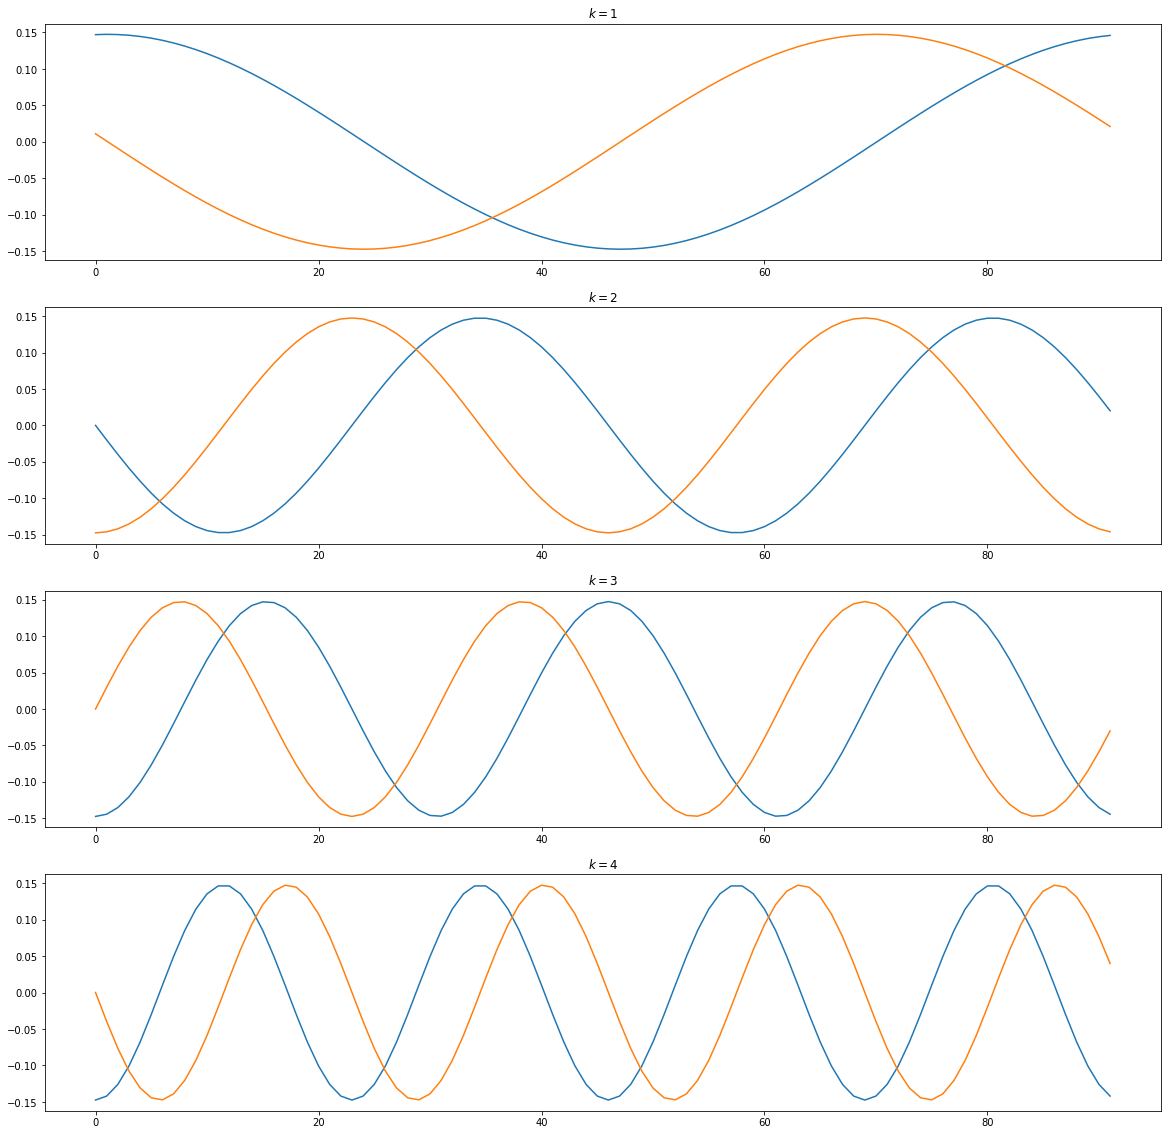

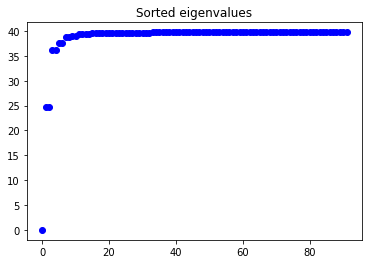

In [2]:
def laplacian(W):
    return np.diag(np.sum(W, axis=0)) - W

def normalized_laplacian(W):
    N = np.alen(W)+1
    D_diag = np.sum(W, axis=0)
    D_minus12 = np.diag([d**(-0.5) for d in D_diag])
    return np.eye(N-1)-D_minus12@W@D_minus12 

def plot_eigen(eigenvalues, eigenvectors):
    N = np.alen(eigenvalues)
    plt.figure(figsize=(20,20))
    if N>3:
        plt.subplot(411)
        plt.plot(eigenvectors[:,np.argsort(np.abs(eigenvalues))[1:3]])
        plt.title('$k = 1$')
    if N>5:
        plt.subplot(412)
        plt.plot(eigenvectors[:,np.argsort(np.abs(eigenvalues))[3:5]])
        plt.title('$k = 2$')
    if N>7:
        plt.subplot(413)
        plt.plot(eigenvectors[:,np.argsort(np.abs(eigenvalues))[5:7]])
        plt.title('$k = 3$')
    if N>9:
        plt.subplot(414)
        plt.plot(eigenvectors[:,np.argsort(np.abs(eigenvalues))[7:9]])
        plt.title('$k = 4$')
    plt.figure()
    plt.plot(np.sort(eigenvalues), 'bo')
    plt.title('Sorted eigenvalues')


# N-1 = number of equispaced points on the circle
# N must be odd
N = 93

# defining the weight matrix
d1 = np.pi*2/(N-1)  # geodesic distance between two equispaced nodes on the unit circle

vect1 = [d1*r for r in range(int((N-1)/2))]
vect2 = list(reversed(vect1))
vect = np.asarray(vect1+[np.pi]+vect2)
vect = vect[:-1]

weights = np.exp(-vect / np.mean(vect))
W = circulant(weights)

# Graph Laplacian
L = laplacian(W)

# Normalized Graph Laplacian
L_norm = normalized_laplacian(W)

eigenvalues, eigenvectors = np.linalg.eigh(L)
plot_eigen(eigenvalues, eigenvectors)

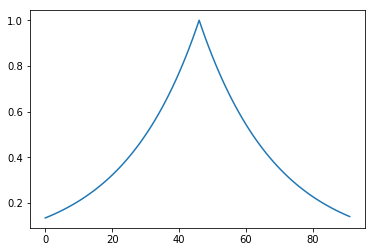

In [3]:
plt.plot(W[int(N/2),:])

# We repeat the experiment with a FULL GRAPH with EXPONENTIAL EUCLIDEAN WEIGHTING (same scheme of Deferrard/Perraudin and Belkin/Nyiogi)

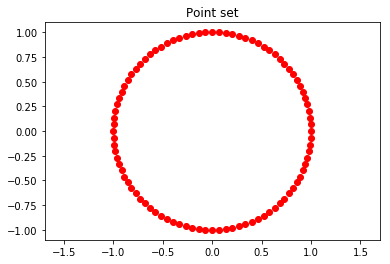

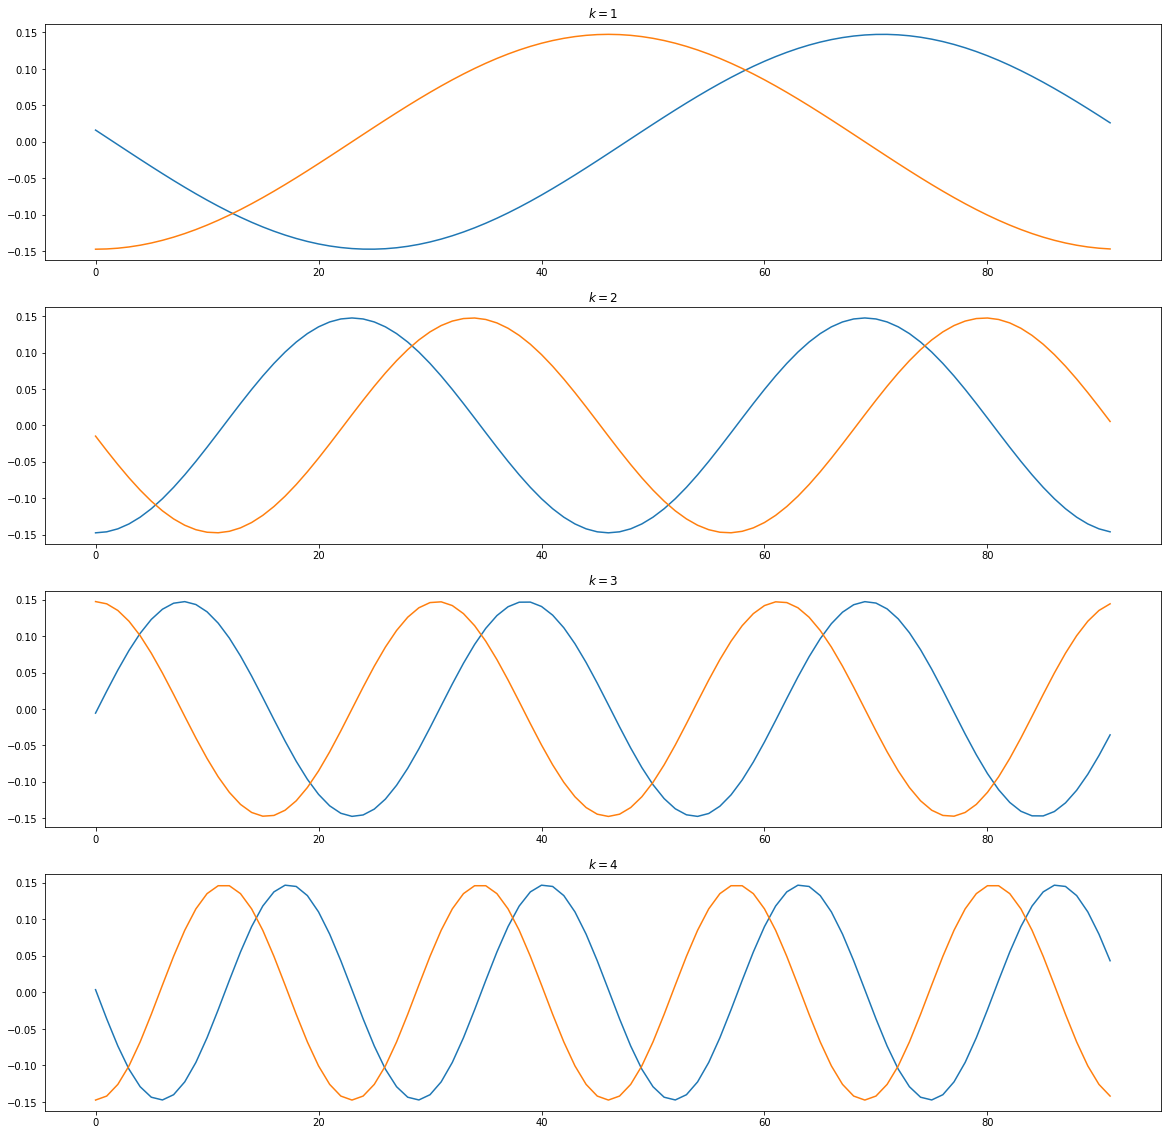

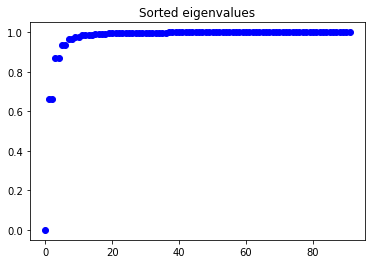

In [4]:
# defining the weight matrix as in Deferrard/Perraudin, Belkin/Nyiogi
xx = np.linspace(0,2*np.pi, N)
xx = xx[:-1]
assert len(xx) == N-1, len(xx)
yy = np.sin(xx)/np.sqrt(np.pi)

pointset = np.zeros((N-1, 2))
pointset[:,0] = np.cos(xx)
pointset[:,1] = np.sin(xx)
plt.plot(pointset[:,0], pointset[:,1], 'ro')
plt.axis('equal')
plt.title('Point set')
vect = spatial.distance.cdist(pointset[0].reshape((1,2)), pointset)
weights = np.exp(-vect / np.mean(vect))
W = circulant(weights)

# Graph Laplacian
L = laplacian(W)

# Normalized Graph Laplacian
L_norm = normalized_laplacian(W)

eigenvalues, eigenvectors = np.linalg.eig(L_norm)
plot_eigen(eigenvalues, eigenvectors)

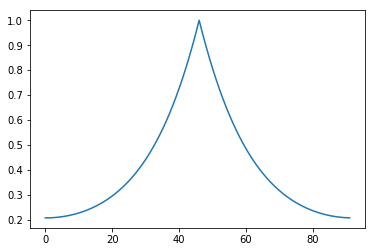

In [5]:
plt.plot(W[int(N/2),:])

# Now we do it for the 2NN graph:

We'll test the following lemma:

### Lemma 5.2.1 from Daniel A. Spielman's Lecture Notes
The Laplacian of the 2-Nearest-Neighbours ring graph $R_n$ on $n$ vertices has eigenvectors
$$\mathbf x_k(u) = \cos(2k\pi u/n)$$
$$\mathbf y_k(u) = \sin(2k\pi u/n)$$
for $0\leq k\leq n/2$, ignoring $\mathbf y_0 = \mathbf 0$ and for even $n$ ignoring $\mathbf y_{n/2}$ for the same reason. Eigenvectors $\mathbf x_k, \mathbf y_k$ have eigenvalues $2-2\cos(2\pi k/n)$

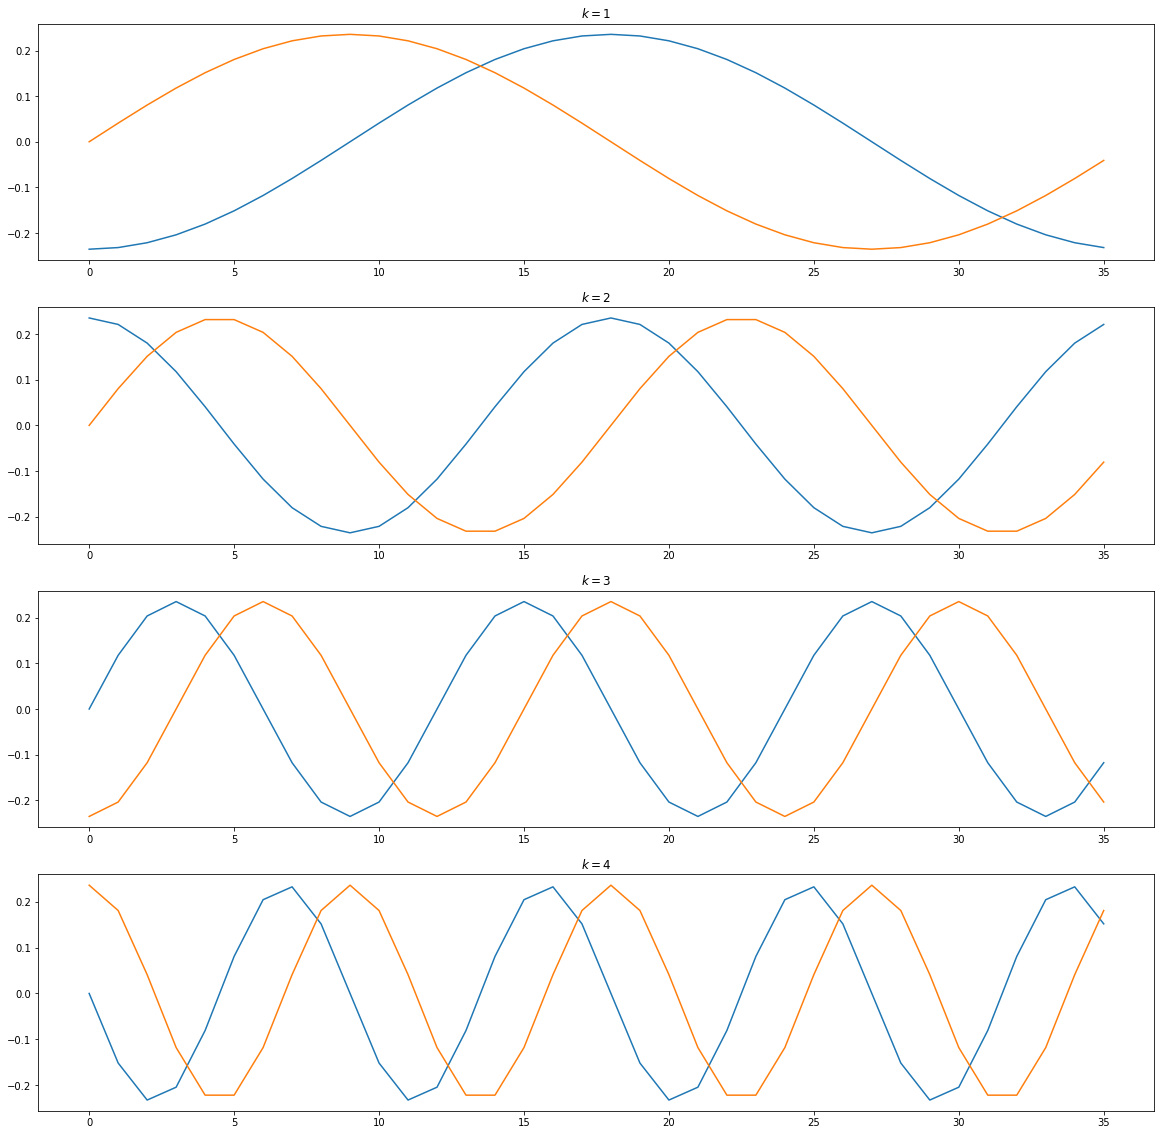

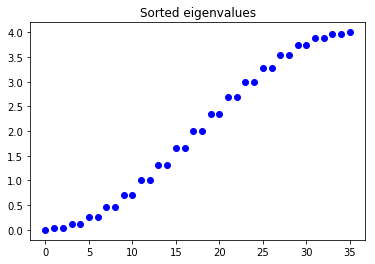

In [6]:
N = 37

# defining the Adjacency matrix
W = np.diag(np.ones((N-2)), 1) + np.diag(np.ones((N-2)), -1) 
W[-1, 0] = 1
W[0, -1] = 1

# computing the laplacian
L = laplacian(W)
L_norm = normalized_laplacian(W)

# computing the spectral decomposition
eigenvalues, eigenvectors = np.linalg.eigh(L)
plot_eigen(eigenvalues, eigenvectors)

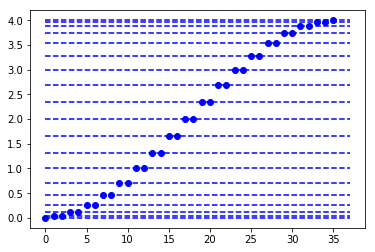

In [7]:
# checking the truth of the lemma on the eigenvalues
plt.plot(np.sort(eigenvalues), 'bo')
for k in range(int(N/2)+1):
    plt.plot([0, N], np.ones(2)*2-2*np.cos(2*np.pi*k/(N-1)), 'b--')

For a rescaled weight matrix W where I keep track of the geodesic distance, the eigenvectors are the same and the eigenvalues get rescaled. 

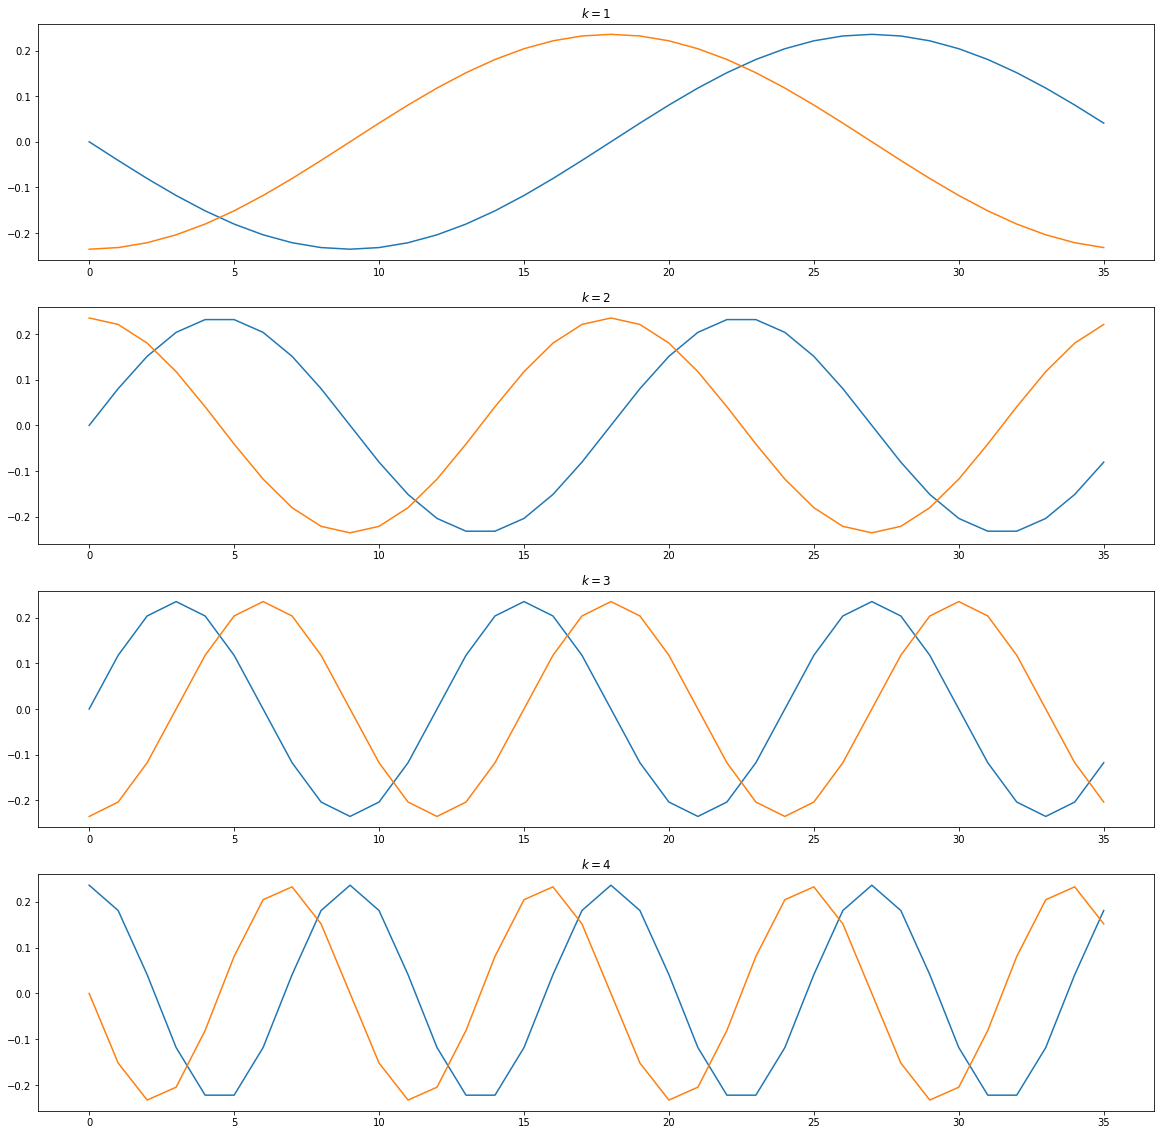

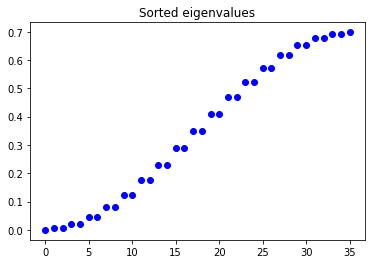

In [8]:
# defining the Adjacency matrix
W = np.diag(np.ones((N-2)), 1) + np.diag(np.ones((N-2)), -1) 
W[-1, 0] = 1
W[0, -1] = 1

# d1 is the gedesic distance between two points
d1 = np.pi*2/(N-1)
W *= d1

# computing the laplacian
L = laplacian(W)
L_norm = normalized_laplacian(W)

# computing the spectral decomposition
eigenvalues, eigenvectors = np.linalg.eigh(L)

#plotting the first 5 eigenvectors corresponding to the lowest 5 eigenvalues
plot_eigen(eigenvalues, eigenvectors)

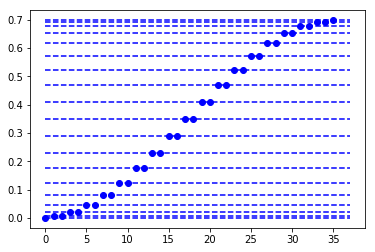

In [9]:
# checking the truth of the lemma on the eigenvalues

empiric_scaling_factor = np.max(eigenvalues)/4.
plt.plot(np.sort(eigenvalues), 'bo')
for k in range(int(N/2)+1):
    plt.plot([0, N], (np.ones(2)*2-2*np.cos(2*np.pi*k/(N-1)))*empiric_scaling_factor, 'b--')

In [10]:
theoretical_scaling_factor = d1
print(theoretical_scaling_factor)
print(empiric_scaling_factor)

0.17453292519943295
0.17453292519943292


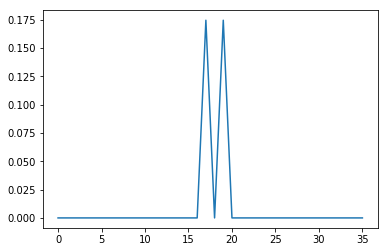

In [11]:
plt.plot(W[int(N/2),:])

# Questions:

## (1) how come that the eigenvalues are limited in [0, 4]? The eigenvalues of the operator Laplace-Beltrami are negative and unbounded! Let's try to see what do we obtain by replacing the eigenvalues of the graph laplacian with the eigenvalues of the continuous operator and see what graph laplacian we obtain.

REMEMBER: Laplace Beltrami in Cylindrical coordinates $$\triangle \Phi(\rho, \theta) = \frac{1}{\rho}\partial_\rho \left(\frac{1}{\rho}\partial_\rho \Phi\right) + \frac{1}{\rho^2}\partial_{\theta\theta}\Phi$$

We sampled the 1-sphere with N-1 points $\mathcal S = \{x_i\}_{i=0}^{N-1}$, we compute the matrix
$$ U\in \mathbb(R)^{N-1 \times N-1}$$ made of N-1 eigenvectors (here parametrized by the angle $\theta$) $$\mathcal B = \{1, \frac{\sin \theta}{\sqrt \pi}, \frac{\cos \theta}{\sqrt \pi}, \frac{\sin 2\theta}{\sqrt \pi}, \frac{\cos 2\theta}{\sqrt \pi}, ...\}$$ sampled in $\mathcal S$

Given the matrix $U$, the corresponding diagonal matrix of eigenvalues SHOULD BE $\Lambda = \text{diag}\{0, -1, -1, -4, -4, ...\}$ (This should follow from lemma (2) of Belkin-Nyiogi, the Laplacian on the 1-sphere (the circle) parametrized by the angle $\theta$ is just the Laplacian on the 1D interval $[0, 2\pi]$)

I'll try now to take the eigenvectors of the Laplacian of the Spielman's lemma, change the eigenvalue and see the graph that results.

In [12]:
eigenvalues_prime = np.zeros(N-1)
n = 0
for i in range(N-1):
    if i == 0:
        eigenvalues_prime[i] = 0
    elif i % 2 == 1:
        n += 1
        eigenvalues_prime[i] = -n**2
    elif i % 2 == 0:
        eigenvalues_prime[i] = -n**2
        
Lprime = eigenvectors@np.diag(eigenvalues_prime)@eigenvectors.T
Lprime

array([[-108.16666667,   65.82304782,  -16.58171874, ...,    7.46410162,
         -16.58171874,   65.82304782],
       [  65.82304782, -108.16666667,   65.82304782, ...,   -4.27431609,
           7.46410162,  -16.58171874],
       [ -16.58171874,   65.82304782, -108.16666667, ...,    2.79945497,
          -4.27431609,    7.46410162],
       ...,
       [   7.46410162,   -4.27431609,    2.79945497, ..., -108.16666667,
          65.82304782,  -16.58171874],
       [ -16.58171874,    7.46410162,   -4.27431609, ...,   65.82304782,
        -108.16666667,   65.82304782],
       [  65.82304782,  -16.58171874,    7.46410162, ...,  -16.58171874,
          65.82304782, -108.16666667]])

In [13]:
L

array([[ 0.34906585, -0.17453293,  0.        , ...,  0.        ,
         0.        , -0.17453293],
       [-0.17453293,  0.34906585, -0.17453293, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.17453293,  0.34906585, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.34906585,
        -0.17453293,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.17453293,
         0.34906585, -0.17453293],
       [-0.17453293,  0.        ,  0.        , ...,  0.        ,
        -0.17453293,  0.34906585]])

In [14]:
np.diag(Lprime)

array([-108.16666667, -108.16666667, -108.16666667, -108.16666667,
       -108.16666667, -108.16666667, -108.16666667, -108.16666667,
       -108.16666667, -108.16666667, -108.16666667, -108.16666667,
       -108.16666667, -108.16666667, -108.16666667, -108.16666667,
       -108.16666667, -108.16666667, -108.16666667, -108.16666667,
       -108.16666667, -108.16666667, -108.16666667, -108.16666667,
       -108.16666667, -108.16666667, -108.16666667, -108.16666667,
       -108.16666667, -108.16666667, -108.16666667, -108.16666667,
       -108.16666667, -108.16666667, -108.16666667, -108.16666667])

In [15]:
np.sum(Lprime, axis=0)

array([ 7.10542736e-14, -2.84217094e-14,  1.35003120e-13, -7.19424520e-14,
       -4.70734562e-14,  9.59232693e-14, -1.71418435e-13,  1.81188398e-13,
       -1.63424829e-13,  8.61533067e-14, -1.53654867e-13,  1.14575016e-13,
        3.73034936e-14, -5.68434189e-14,  1.29674049e-13, -1.33226763e-14,
        7.10542736e-15, -1.58983937e-13,  2.33590924e-13, -1.96287431e-13,
        3.55271368e-14, -1.33226763e-14,  1.27897692e-13, -9.59232693e-14,
        2.30926389e-14,  1.86517468e-14, -1.04805054e-13,  6.48370246e-14,
       -1.38555833e-13,  1.43884904e-13, -2.49578136e-13,  1.09245946e-13,
       -8.34887715e-14, -1.06581410e-14,  8.52651283e-14, -5.68434189e-14])

$L'$ seems to be a Laplacian: the row/column sum is equal to $0$

In [16]:
print(np.linalg.cond(Lprime))
print(np.linalg.cond(L))

1.195957473118485e+16
4.4393435908512424e+16


In [17]:
print(np.sum(np.abs(Lprime)<=0.1))

0


$L'$ is definitely a full matrix

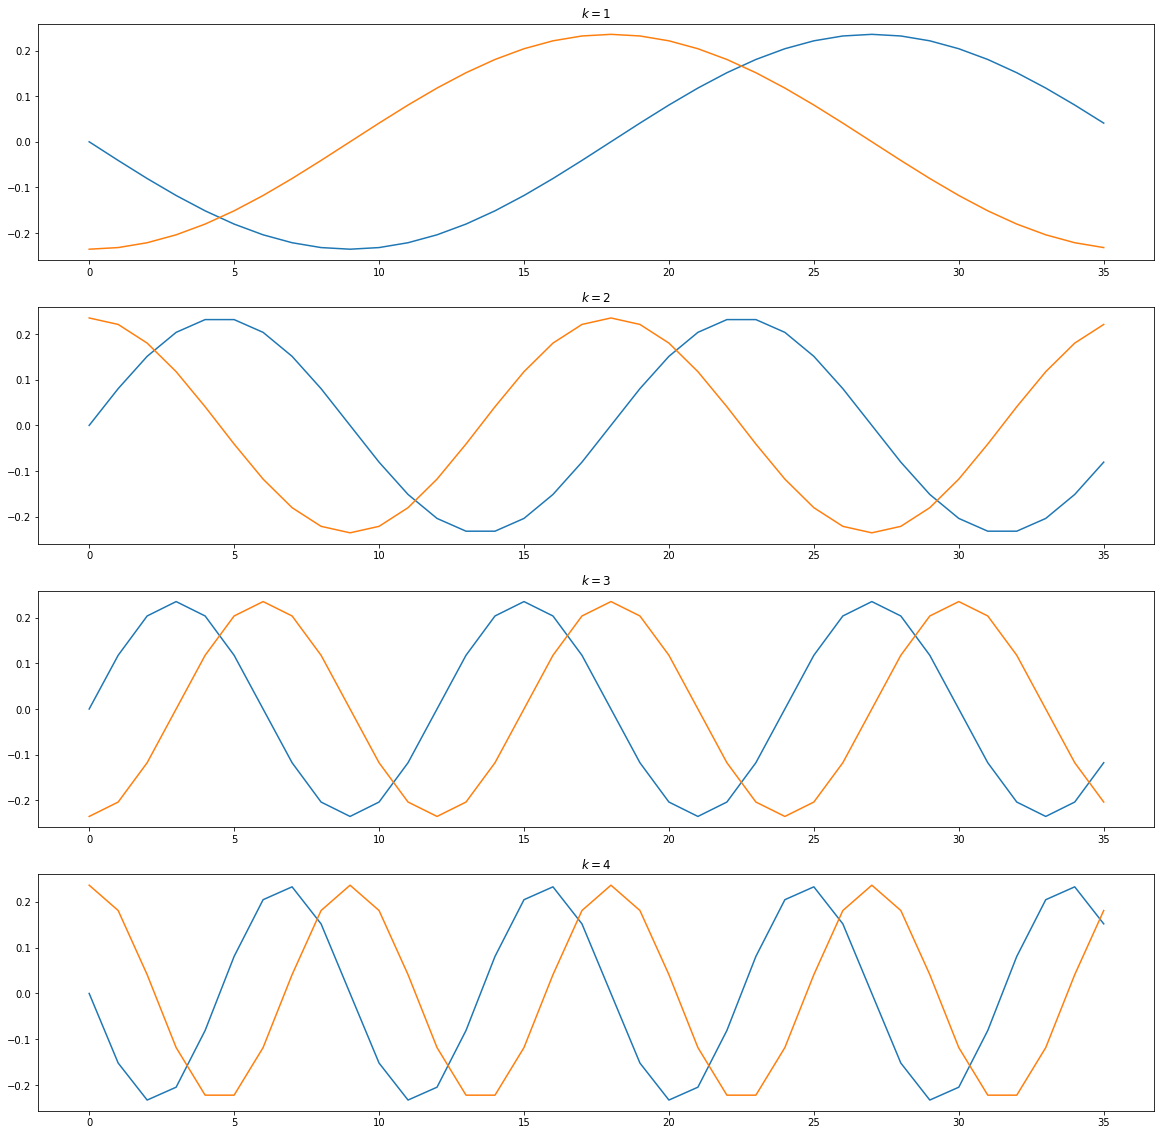

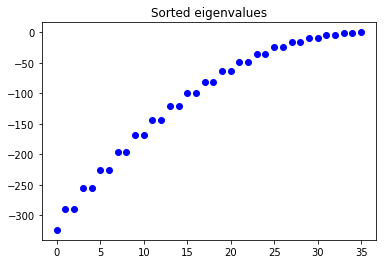

In [18]:
plot_eigen(eigenvalues_prime, eigenvectors)

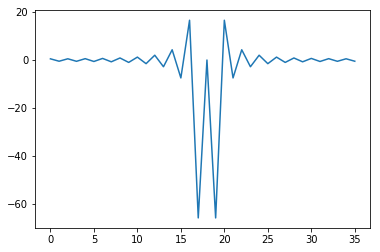

In [19]:
Wprime = -Lprime
Wprime = Wprime-np.diag(np.diag(Wprime))

plt.plot(Wprime[int(N/2),:])

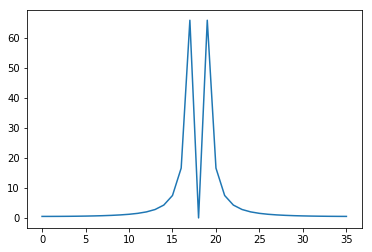

In [20]:
plt.plot(np.abs(Wprime[int(N/2),:]))

## The corresponding adjacency matrix $W'$ has negative weights. $L'$ can't be a Laplacian (at least in our definition, there are other definitions of signed laplacians on graph with negative weights but it doesn't seem to be neither respecting those definitions)! 

Before moving to irregularly sampled circles, I need to clarify this first. What's happening? Why can I have a Graph Laplacian with "same" eigenvectors of the $\triangle_\mathcal M$ but different eigenvalues, and can't I have a Graph Laplacian with "same" eigenvectors and __same__ eigenvalues of $\triangle_\mathcal M$ ?

# ------------------------------------------------------------------------------------
# ------------ SECTION UNDER CONSTRUCTION -----------------------------
# ------------------------------------------------------------------------------------

# Trying to recover the block-diagonal pattern of eigenvectors@harmonics.T

# From the FULL graph EXPONENTIAL GEODESIC DISTANCES as WEIGHTS we calculate the eigenvectors and we plot them

$$(W)_{i,j} = \exp\left(\frac{d_\mathcal M(\bf x_i, \bf x_j)}{\hat d}\right),\quad \hat d = \overline{d_\mathcal M(\bf x_i, \bf x_j)}$$

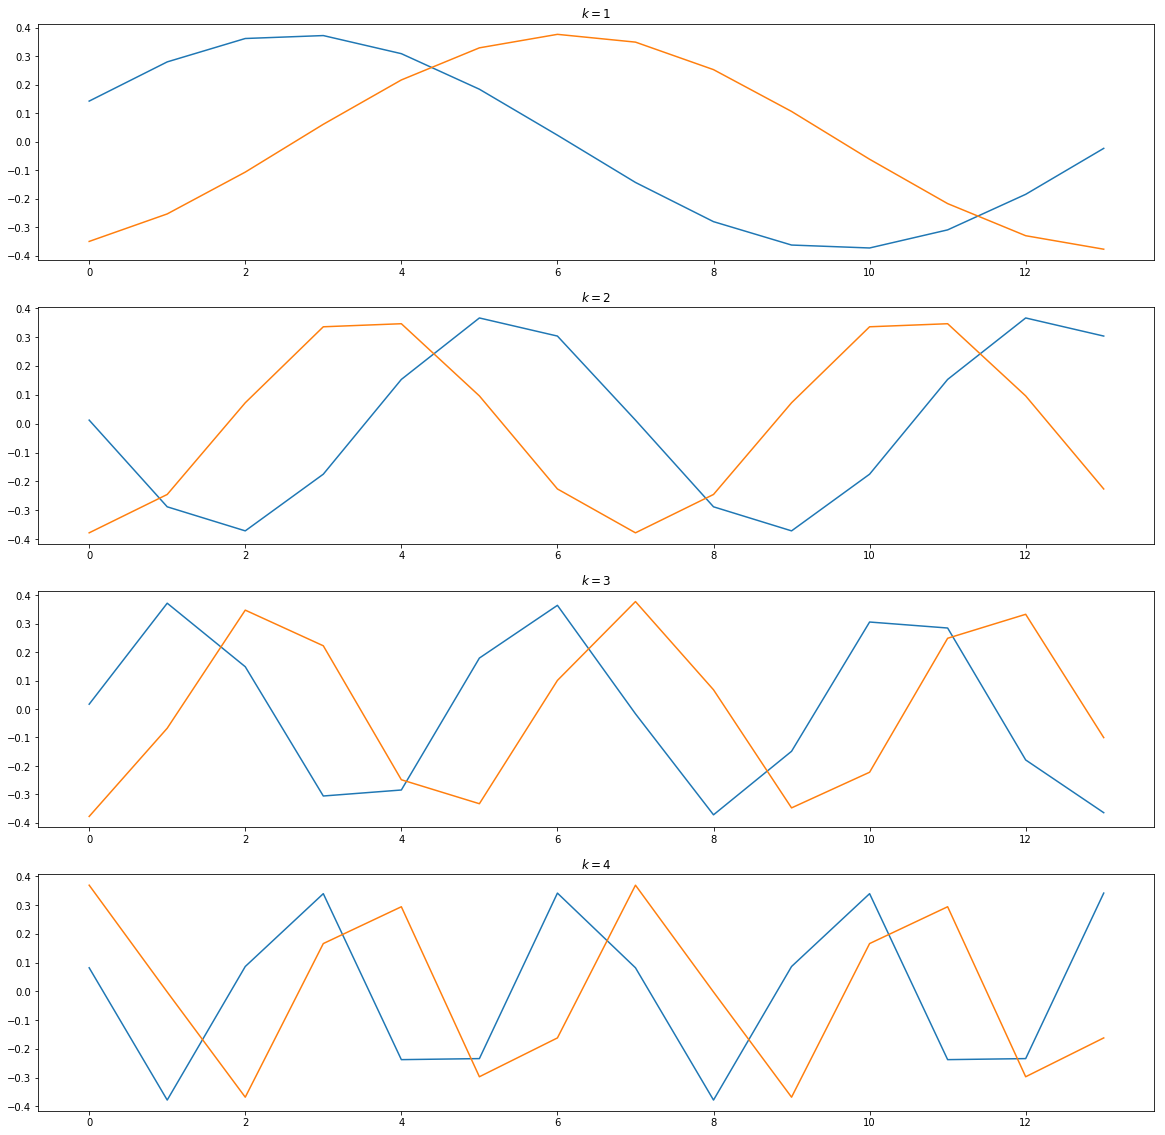

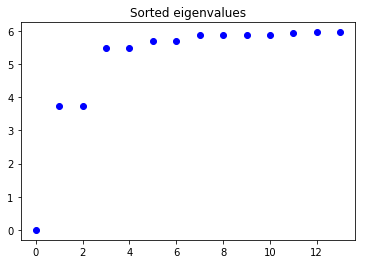

In [66]:
def laplacian(W):
    return np.diag(np.sum(W, axis=0)) - W

def normalized_laplacian(W):
    N = np.alen(W)+1
    D_diag = np.sum(W, axis=0)
    D_minus12 = np.diag([d**(-0.5) for d in D_diag])
    return np.eye(N-1)-D_minus12@W@D_minus12 

def plot_eigen(eigenvalues, eigenvectors):
    N = np.alen(eigenvalues)
    plt.figure(figsize=(20,20))
    if N>3:
        plt.subplot(411)
        plt.plot(eigenvectors[:,np.argsort(np.abs(eigenvalues))[1:3]])
        plt.title('$k = 1$')
    if N>5:
        plt.subplot(412)
        plt.plot(eigenvectors[:,np.argsort(np.abs(eigenvalues))[3:5]])
        plt.title('$k = 2$')
    if N>7:
        plt.subplot(413)
        plt.plot(eigenvectors[:,np.argsort(np.abs(eigenvalues))[5:7]])
        plt.title('$k = 3$')
    if N>9:
        plt.subplot(414)
        plt.plot(eigenvectors[:,np.argsort(np.abs(eigenvalues))[7:9]])
        plt.title('$k = 4$')
    plt.figure()
    plt.plot(np.sort(eigenvalues), 'bo')
    plt.title('Sorted eigenvalues')

from scipy.linalg import circulant

# N-1 = number of equispaced points on the circle
# N must be odd
N = 15

# defining the weight matrix
d1 = np.pi*2/(N-1)  # geodesic distance between two equispaced nodes on the unit circle

vect1 = [d1*r for r in range(int((N-1)/2))]
vect2 = list(reversed(vect1))
vect = np.asarray(vect1+[np.pi]+vect2)
vect = vect[:-1]

weights = np.exp(-vect / np.mean(vect))
W = circulant(weights)

# Graph Laplacian
L = laplacian(W)

# Normalized Graph Laplacian
L_norm = normalized_laplacian(W)

eigenvalues, eigenvectors = np.linalg.eigh(L)
plot_eigen(eigenvalues, eigenvectors)

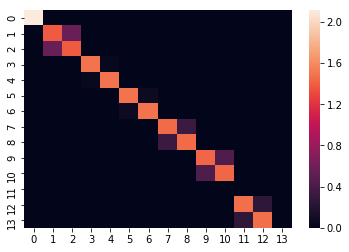

In [67]:
import seaborn as sns

def harmonics(N):
    thetas = np.linspace(0,2*np.pi,N)[:-1]
    V = np.zeros((N-1,N-1))
    k = 0
    for i in range(N-1):
        if i == 0:
            V[:,i]=0
        if i % 2 == 1:
            k += 1
            V[:,i]= np.sin(k*thetas)/np.sqrt(np.pi)
        if i % 2 == 0:
            V[:,i]= np.cos(k*thetas)/np.sqrt(np.pi)
    return V

V = harmonics(N)

sns.heatmap(np.abs(eigenvectors.T@V))

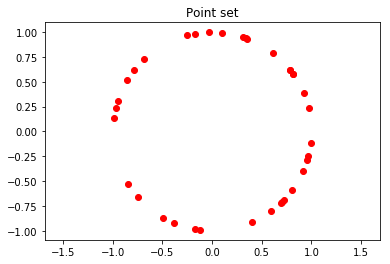

In [79]:
N = 36 # 1+3+5+7+9+11+13

xx = np.random.rand(N)*2*np.pi
assert len(xx) == N, len(xx)
yy = np.sin(xx)/np.sqrt(np.pi)

pointset = np.zeros((N, 2))
pointset[:,0] = np.cos(xx)
pointset[:,1] = np.sin(xx)
plt.plot(pointset[:,0], pointset[:,1], 'ro')
plt.axis('equal')
plt.title('Point set')


def block_diag_norm(A):
    shift = 0
    while(shift<np.alen(A)):
        k = 2  # for the 2Sphere, k = 2*i+1
        A[shift:shift+k, shift:shift+k] = 0
        shift += k
    return np.linalg.norm(A)
    
def loss_function(W):
    L = laplacian(W)
    Lambda, U = np.linalg.eigh(L)
    return block_diag_norm(U.T@V)
    
    
def gaussian_metropolis(loss_function, W0, T0, Nsteps, sigma):
    N = np.alen(W0)
    
    loss0 = loss_function(W0)
    loss = loss0.copy()
    W = W0
    T = T0
    dT = T0/Nsteps
    while T>0:
        eps = sigma*np.random.rand(N,N)
        Z = W+eps
        temp_loss = loss_function(Z)
        if temp_loss < loss+T:
            W = Z
            loss = temp_loss
        T -= dT
    if loss0-loss > 0:
        return W, np.linalg.norm(W-W0), loss0-loss
    print('WARNING: OPTIMIZATION DID NOT SUCCED')
    return W, 0, 0

In [80]:
# initializing the weights with the weight matrix of the FULL graph with exponential geodesic distances
W0 = W
T0 = 100
Nsteps = 1000
sigma = 0.001

W1, _, _ = gaussian_metropolis(loss_function, W0, T0, Nsteps, sigma)

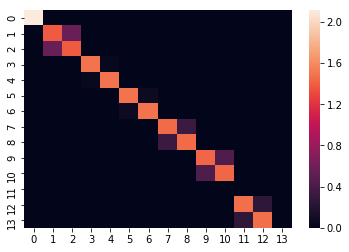

In [81]:
L = laplacian(W)
Lambda, U = np.linalg.eigh(L)
sns.heatmap(np.abs(U.T@V))

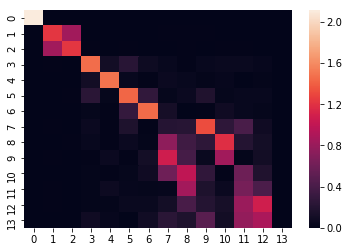

In [82]:
L = laplacian(W1)
Lambda, U = np.linalg.eigh(L)
sns.heatmap(np.abs(U.T@V))

optimizer LU-LambdaU
